# データ解析特論 2022年度水曜２限

# 第9回 その1 分類ことはじめ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

これまでは主に回帰をやってきた．回帰とは説明変数 $(x_1, x_2, \ldots, x_n)$ と目的変数 $y$ の間に $y=f(x_1, x_2, \ldots, x_n)$ のような関数関係を与えることを意味する．特に $y$ は数値変数を扱ってきたのだった．

データ科学では数値変数だけでなくラベル変数（カテゴリー変数）を扱う場合もある．例えば iris データセットでいうと，target に入っているのはあやめの種類 Setosa, Versicolor, Virginica である．これらのラベルにはそれぞれ 0, 1, 2 という数値が与えられているが，数値自体に意味はない．Setosa にラベル 2 を付与しても構わないし，ラベルの数値の大小関係にも意味はない．あくまで別の種類であることがわかれば良い．

もしあやめの SL, SW, PL, PW から種類 Sp を当てる問題を考えるなら，それは
$$
\mathrm{Sp} = f(\mathrm{SL}, \mathrm{SW}, \mathrm{PL}, \mathrm{PW})
$$
という関係を考えることになる．これも一見して回帰と同じ形をしている．実際 Sp を 0, 1, 2 という数値ラベルで考えるなら，回帰と全く同様の計算ができる．ただし，上述の通り Sp のラベルの値自体に意味はないので，それらを取り替えたとしてもラベル変数を当てる回帰ができないといけないことには注意しよう．

以下では，まずこれまでと全く同様の回帰の手法でラベルの分類手法を試してみよう．

## データセット読み込み

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


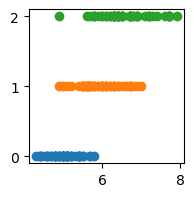

In [11]:
# IRISデータセット読み込み
iris = datasets.load_iris()

# データの特徴量
print(iris.feature_names)
print(iris.target_names)

#　データセット読み込み (SLとSpのみ)
SL = iris.data[:, 0]
Sp = iris.target 

# SL と種別の図
fig, ax = plt.subplots(figsize=(2, 2 ))
for i in range(3):
    ax.scatter(SL[Sp==i], Sp[Sp==i])
ax.set_yticks([0, 1, 2])

### 2値分類

Iris のデータのうち，Setosa と Virginica だけを取り出し，それらの分類を行うことにする．ラベルが2種の場合の分類を **2値分類** という．

Virginica のラベルは 2 だが，便宜上 1 に付け替えることにする．（別に 2 のままでも全く問題ない．）

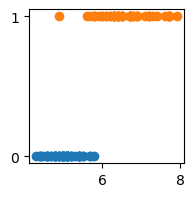

In [13]:
# Setosa と Virginica のデータだけ取り出す
X = SL[Sp!=1]

# Setosa と Virginica のデータだけ取り出し，Virginica のラベルを2から1に変える
Y = Sp[Sp!=1]/2

# SL と2種のみの種別の図
fig, ax = plt.subplots(figsize=(2, 2 ))
for i in range(2):
    ax.scatter(X[Y==i], Y[Y==i])
ax.set_yticks([0, 1])
plt.show()

このデータだと，SLの値が小さいと Setosa, 大きいと Virginica という傾向がある．種別のラベルは SL の関数として表すことができそうだ．では学習データとテストデータに分けて回帰してみよう．

### train-test split


In [15]:
# 学習データとテストデータに分割
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.5)
Xtrain.shape

(50,)

In [ ]:
# SL と2種のみの種別の図



## 線形回帰を試す

Sp を SL の単回帰で表すことにする．

注意しないといけないことは，Setosa と Virginica は 0 or 1 というラベルで表されていることである．当たり前だが，線形単回帰を用いると得られるのは直線であってラベルではない．

線形単回帰で回帰直線からラベルを与える方法はいくつか考えられる．以下では例として，回帰直線 $y = a_1 x + a_0'$ において $y$ が $1/2$ を上回るか否かでラベルを与えることにしよう．

このように数値の範囲を分割することでラベル化する場合の境界を **決定境界**という．今の場合は説明変数が1つなので，決定境界は点で表される．この場合の決定境界は $y=1/2$ となる $x$ であるから，
$$
x_0 = \frac{1/2-a_0}{a_1}
$$
と定まる．

つまり，ラベル $l$ は
$$
l = \begin{cases}
1 & (x>x_0) \\
0 & (x<x_0) 
\end{cases}
$$
と与えるというわけだ．

$x=x_0$ のデータは決定境界の上にあるので，判定不可とするかもしくは便宜上どちらかのラベルに入れておく．

In [19]:
# 線形回帰
reg = LinearRegression()

# 学習データで fit し，学習結果を predict で与える
YtrainP = reg.fit(Xtrain.reshape(-1, 1), Ytrain).predict(Xtrain.reshape(-1, 1))

# テストデータの予測値を predict で与える
YtestP = reg.predict(Xtest.reshape(-1, 1))

# 回帰係数を a0, a1 とおく
a0 = reg.intercept_
a1 = reg.coef_[0]

# 決定境界 x0
x0 = (0.5-a0)/a1
print(x0)

# 回帰値からラベル化
YtestPL = (YtestP > 0.5)
YtrainPL = (YtrainP > 0.5)
YtrainPL

5.904381846635367


array([False, False,  True, False,  True, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False,  True, False])

### 線形回帰の結果

まずはそのまま単回帰の結果を描画しよう

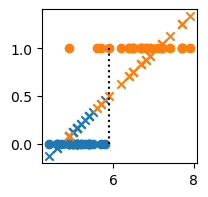

In [23]:
# 学習データの結果を描画
fig, ax = plt.subplots(figsize=(2, 2))
# ラベル0
ax.scatter(Xtrain[Ytrain==0], Ytrain[Ytrain==0], label='setosa: train', marker='o',
          c='tab:blue')
# ラベル0の予測値
ax.scatter(Xtrain[Ytrain==0], YtrainP[Ytrain==0], label='setosa: prediction', 
           marker='x', c='tab:blue')
# ラベル1
ax.scatter(Xtrain[Ytrain==1], Ytrain[Ytrain==1], label='virginica: train',
          marker='o', c='tab:orange')
# ラベル1の予測値
ax.scatter(Xtrain[Ytrain==1], YtrainP[Ytrain==1], label='virginica: prediction',
          marker='x', c='tab:orange')
# 回帰直線

# 決定境界
ax.plot([x0, x0], [0, 1], ':k')

# MSE


ラベルを数値データだと思うと，回帰直線の誤差は決して小さくない．


### 回帰をラベル化

しかし，回帰直線から得られる決定境界を用いてラベルを算出するとよくフィッティングできている．

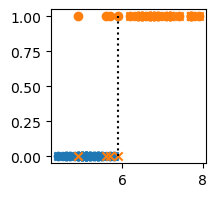

In [24]:
# 学習データの結果を描画
fig, ax = plt.subplots(figsize=(2, 2))
# ラベル0
ax.scatter(Xtrain[Ytrain==0], Ytrain[Ytrain==0], label='setosa: train', marker='o',
          c='tab:blue')
# ラベル0の予測値
ax.scatter(Xtrain[Ytrain==0], YtrainPL[Ytrain==0], label='setosa: prediction', 
           marker='x', c='tab:blue')
# ラベル1
ax.scatter(Xtrain[Ytrain==1], Ytrain[Ytrain==1], label='virginica: train',
          marker='o', c='tab:orange')
# ラベル1の予測値
ax.scatter(Xtrain[Ytrain==1], YtrainPL[Ytrain==1], label='virginica: prediction',
          marker='x', c='tab:orange')
# 回帰直線

# 決定境界
ax.plot([x0, x0], [0, 1], ':k')

# MSE


## 性能評価

ラベル変数の場合は MSE のような評価指標では必ずしも分類性能を評価できない．

単純に当たった割合を評価することにしよう．ここでは `sklearn.metrics` に入っている

- confusion matrix (混同行列)
- classification report

を用いよう．

In [28]:
# confusion matrix
print(confusion_matrix(Ytrain, YtrainPL))

# classification report
print(classification_report(Ytrain, YtrainPL))


[[24  0]
 [ 4 22]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        24
         1.0       1.00      0.85      0.92        26

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.93      0.92      0.92        50



ではテストデータではどうか．ラベルの値で描画してみよう．

In [ ]:
# テストデータのラベル予測を描画


# ラベル0


# ラベル0の予測ラベル


# ラベル1


# ラベル1の予測ラベル


# 回帰直線


# 決定境界


# confusion matrix


# classification report




このテストデータではラベル 1 を 0 に誤分類するケースが増えたものの，全体としては良い分類を与えている．

このようにラベルデータを数値と見なして回帰を行うこともできる．ただ，線形回帰よりラベルらしく回帰する方法がある．それが次にやる **ロジスティック回帰** である．

## 課題09-1

では同様のことを Setosa と Versicolor のデータに対してやってみよ．適当なサイズで学習データとテストデータに分けて，confution matrix を確認してみること．

---
## <div style="text-align: right;"><strong>ADCA2022_09-2 につづく</strong></div>